# K-Means

### Algoritmo clássico de agrupamento particional
* Defini-se o valor de **k**
* Cada grupo é associado a um **centroid** (ponto central)
* Cada objeto é atribuído ao grupo com centroid mais próximo
* Algoritmo simples

**@autor: [Juarez Monteiro](https://jrzmnt.github.io).**

---

### Observação sobre este Notebook

Este material possui o foco em realizar um agrupamento através do algoritmo ***K-Means*** independente do valor de $k$ escolhido.Para verificarmos a qualidade do processo, iremos calcular o ***SSE*** e o ***SSWC*** do agrupamento.

---
### Primeiro iremos iniciar com os *imports* necessários
* A lib Numpy para facilitar nossas futuras manipulações em estruturas de dados
* E a Matplotlib para tornar nossos exemplos um pouco mais visuais

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---
### Definindo a função de distância
Conforme visto em aula, iremos calcular a similaridade através da ***distância Euclidiana***

$$
\sqrt{\sum_{i=1}^{n}(q_i - p_i)^2}
$$

*Onde $p$ e $q$ são pontos em um espaço Euclidiano de $n$ dimensões*

In [2]:
def distance_calc(obj, centroids):
    
    dist = np.array([])
    
    for j in range(len(centroids)):
        for i in range(len(obj)):
            dist = np.append(dist, np.sqrt((obj[i][0]-centroids[j][0])**2 + (obj[i][1]-centroids[j][1])**2))
    
    return dist.reshape(len(centroids), len(obj))

---
### Definindo a função para a escolha dos grupos
* Para atribuirmos os objetos aos seus respectivos grupos devemos verificar a distância dos objetos aos centroids
* Feito isso nós iremos atribuir os objetos ao grupo do centroid mais próximo a ele

In [3]:
def choose_cluster(dist):

    clusters = np.array([])
    min_dist = 0.
    group = 0
    
    for i in range(dist.shape[1]):
        for j in range(dist.shape[0]):
            if j == 0:
                min_dist = dist[j][i]
                group = j
                
            elif dist[j][i] < min_dist:
                min_dist = dist[j][i]
                group = j
                
        clusters = np.append(clusters, group)
    
    return clusters

---
### Recalculando os centroids...
* Lembrando que para recalcular os centroids nós iremos fazer a média dos objetos para cada grupo

In [4]:
def recalc_centroids(obj, clusters):
    
    new_centroids = np.array([])
    
    for i in range(len(np.unique(clusters))):
        new_centroids = np.append(new_centroids, np.average(obj[np.where(clusters==i)], axis=0))    
    
    return new_centroids.reshape(len(np.unique(clusters)),2)

---
### Avaliando Agrupamentos com o SSE e o SSWC

#### - SSE
* Medida mais comum é a Soma dos Erros Quadráticos (SSE - *Sum of Squared Errors*)
    * Para cada objeto, o erro é a distância ao grupo mais próximo
    * Para calcular o SSE, elevamos os erros ao quadrado e os somamos<br><br>
    $$
    SSE=\sum_{i=1}^{k}\sum_{x \in C_i}dist^2(m_i, x)
    $$
    <br>
    *Onde $x$ é o objeto do grupo $C_i$ e $m_i$ é o centroid do grupo $C_i$*<br><br>
    
    * Com isso, dado dois agrupamentos, podemos escolher o de menos SSE
        * Mas atenção! Apenas compare agrupamentos **de mesmo $k$**
        
    * Quanto **menor o SSE**, mais compactos (coesos) são os grupos, pois minimizar o SSE significa minimizar a variância intra-grupo!
      
#### - SSWC
* Silhueta Simplificada (SSWC)

$$
s(i) = \frac{b(i)-a(i)}{max\{a(i),b(i)\}}
$$

<br>

$$
SSWC=\frac{1}{N}\sum_{i=1}^{N}s(i)
$$

* $a(i)$ e $b(i)$ são calculados como a distância do i-ésimo objeto ao centróide do cluster em questão
    * $a(i)$ = dissimilaridade média do i-ésimo objeto ao seu cluster
    * $b(i)$ = dissimilaridade média do i-ésimo objeto ao cluster do vizinho mais próximo <br><br>
* Propriedade favorável: $SSWC \in [-1, +1]$


In [5]:
def sse_calc(distances):
    
    return np.sum(np.square(np.minimum(distances[0], distances[1])))


def sswc_calc(distances):

    return np.average(np.absolute((distances[0]-distances[1]))/np.maximum(distances[0], distances[1]))

---
### Definindo uma função para plot

In [6]:
def plot_kmeans(obj, clusters, centroids, iteration):
    
    plt.figure()
    
    for k in range(len(np.unique(clusters))):
        plt.plot([i[0] for i in obj[np.where(clusters==k)]],
                 [i[1] for i in obj[np.where(clusters==k)]],
                 'o',
                 label='Group %d' %k)
    
    for _,y in enumerate(centroids):
        if _ == 0:
            plt.plot(y[0], y[1], 'b*', label='Centroids')
            
        else:
            plt.plot(y[0], y[1], 'b*')
    
    
        plt.annotate(
            '(%.1f, %.1f)' % (y[0], y[1]),
            xy=(y[0], y[1]), arrowprops=dict(arrowstyle='->'), xytext=(y[0]+0.3, y[1]))
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.title('Iteration %i' %iteration)

---
### Juntando as chamadas em uma função e construindo o loop...

In [7]:
def run_kmeans(obj, centroids):
    
    i = 1
    
    while True:
        print('Iteration %i' % i)
        
        distances = distance_calc(obj, centroids)
        clusters = choose_cluster(distances)
        new_centroids = recalc_centroids(obj, clusters)
        plot_kmeans(obj, clusters, centroids, i)
        
        print('SSE: %.2f' % sse_calc(distances))
        print('SSWC: %.2f' % sswc_calc(distances))
        print('---')
        
        if np.array_equal(centroids, new_centroids):
            print('Stoped in iteration %i' %i)
            break
        
        centroids = new_centroids
        i+=1
        
    return

---
### Pronto, agora é só repetir até o algoritmo convergir!
* Em outras palavras até os centroids não mudarem mais

Iteration 1
SSE: 66.00
SSWC: 0.46
---
Iteration 2
SSE: 25.00
SSWC: 0.65
---
Iteration 3
SSE: 26.22
SSWC: 0.65
---
Iteration 4
SSE: 25.00
SSWC: 0.65
---
Stoped in iteration 4


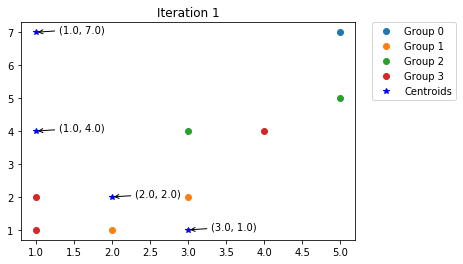

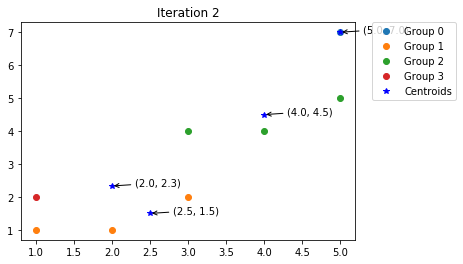

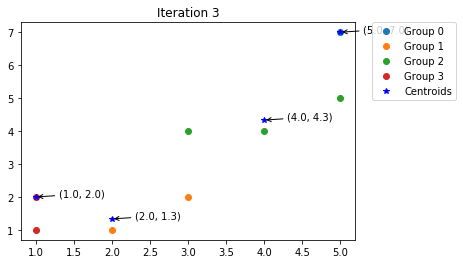

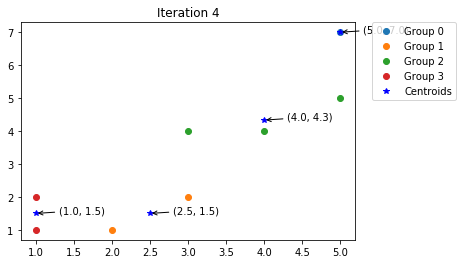

In [8]:
obj = np.array([[1,1],[1,2],[2,1],[3,2],[3,4],[4,4],[5,5], [5,7]])
centroids = np.array([[1,7],[3,1],[1,4],[2,2]])
run_kmeans(obj, centroids)